# Reproduction of Article
1. Steps:
    1. Import Data
    1. Initial Data Exploration
        1. Data Summary Table
    1. Comparison with article Data

In [25]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import codecs
root_path_report="C:\\Users\\Debora\\Documents\\01_UFU_local\\01_comp_evolutiva\\05_trabalho3\\03_relatorio\\springer\\tables\\"
root_path_data="C:\\Users\\Debora\\Documents\\01_UFU_local\\01_comp_evolutiva\\05_trabalho3\\01_dados\\01_raw\\"
root_path_analysis="C:\\Users\\Debora\\Documents\\01_UFU_local\\01_comp_evolutiva\\05_trabalho3\\01_dados\\02_analysis\\01_implementation\\"
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 130)
pd.set_option('display.width', 2000)


## Parse Data

In [26]:
# import cPickle as pickle
import pickle
from capacidade import Population
def export_obj(obj, path):
    with open(path, "wb") as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)


def load_obj(path):
    with open(path, "rb") as input:
        obj = pickle.load(input)
    return obj

In [27]:
# # Export table to txt for latex
# root_path_report = "C:\\Users\\debor\\Documents\\01_UFU_local\\01_comp_evolutiva\\01_trabalho_1\\03_relatorio\\template-latex\\tables\\"
# file_name = "representacao.txt"
# path = root_path_report + file_name
# with codecs.open(path, 'w', 'utf-8') as outfile:
#     outfile.write(tabela_df.to_latex(index=False))

# Open pickle Exec
file_name='v_0_exec.pkl'
# file_name='step_v_0step_exec.pkl'
path=root_path_data+file_name
infile = open(path,'rb')
ds_exec= pickle.load(infile)
infile.close()

# Open pickle dict class object pop
file_name='v_0_id.pkl'
# file_name='step_v_0_id.pkl'
path=root_path_data+file_name
infile = open(path,'rb')
ds_ind= pickle.load(infile)
infile.close()

# Unpack Data Execution
headers=["Execution","Variant","Hipervolume","Pareto Front"]
df_exec=pd.DataFrame(ds_exec,columns=headers)

# Unpack Data per Ind
headers=["Execution","Variation","Solution","Total throughput [kg]", "Max total backlog [kg]", "Mean total backlog [kg]","std dev total backlog [kg]", "Median total backlog [kg]","Min total backlog [kg]", "P(total backlog ≤ 0 kg)","Max total inventory deficit [kg]", "Mean total inventory deficit [kg]","std dev inventory deficit [kg]", "Median total inventory deficit [kg]", "Min total inventory deficit [kg]","Total Deficit [kg]","Batches [un]","Product label","Start of USP [date]","End of DSP [date]"]

df_ind=pd.DataFrame(ds_ind,columns=headers)

In [28]:
df_exec

,Execution,Variant,Hipervolume,Pareto Front
0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",0.297104,"[[461.5999999999999, 587.0821138904923], [462.9000000000001, 594.1649276769461], [467.79999999999995, 603.42444055723], [470.2..."


### Individuals

In [29]:
df_ind #X and Y solutions

,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,461.6,41.861155,35.532347,2.433653,35.091078,31.213757,0.0,687.323710,591.391954,31.983948,587.082114,514.598901,587.082114,"[21, 16, 31, 12, 7, 7, 8]","[3, 2, 0, 3, 2, 0, 1]","[2016-12-01, 2017-06-22, 2017-11-26, 2018-08-15, 2018-12-26, 2019-03-30, 2019-07-02]","[2017-06-22, 2017-11-26, 2018-08-15, 2018-12-26, 2019-03-30, 2019-07-02, 2019-11-03]"
1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,470.8,44.223134,35.783537,2.391289,35.499388,30.840925,0.0,712.101305,622.197185,36.034471,620.074496,549.307411,620.074496,"[21, 16, 31, 14, 6, 6, 9]","[3, 2, 0, 3, 2, 0, 1]","[2016-12-01, 2017-06-22, 2017-11-26, 2018-08-15, 2019-01-09, 2019-04-06, 2019-07-02]","[2017-06-22, 2017-11-26, 2018-08-15, 2019-01-09, 2019-04-06, 2019-07-02, 2019-11-14]"


- Pareto Front

In [30]:
import copy
import datetime
date=datetime.datetime.now()

file_name_solutions='pop_100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47).pkl'#MODIFY THIS NAME IF NECESSARY
path=root_path_data+file_name_solutions
pop = load_obj(path)
batches=[]
products=[]
objectives=[]
for i in range(0,len(pop.batches_raw)):   
    batches.append(pop.batches_raw[i][pop.masks[i]])
    products.append(pop.products_raw[i][pop.masks[i]])
    objectives.append(pop.objectives_raw[i])
solutions= pd.DataFrame(list(zip(batches,products,objectives)), 
               columns =["Batches","Products","Objectives"]) 
file_name=str(date.day)+"-"+str(date.month)+str(date.hour)+'solutions.csv'
path=root_path_analysis+file_name
solutions.to_csv(path)
solutions

,Batches,Products,Objectives
0,"[21, 16, 31, 12, 7, 7, 8]","[3, 2, 0, 3, 2, 0, 1]","[461.5999999999999, 587.0821138904923]"
1,"[21, 16, 32, 12, 6, 6, 9]","[3, 2, 0, 3, 2, 0, 1]","[462.9000000000001, 594.1649276769461]"
2,"[21, 16, 32, 12, 7, 6, 9]","[3, 2, 0, 3, 2, 0, 1]","[467.79999999999995, 603.42444055723]"
3,"[21, 16, 31, 13, 7, 6, 9]","[3, 2, 0, 3, 2, 0, 1]","[470.20000000000005, 608.0488330054595]"
4,"[21, 16, 31, 14, 6, 6, 9]","[3, 2, 0, 3, 2, 0, 1]","[470.79999999999995, 620.0744959371785]"


In [31]:
pop.backlogs[:, 5]

array([0., 0., 0., 0., 0.])

- Pareto Front

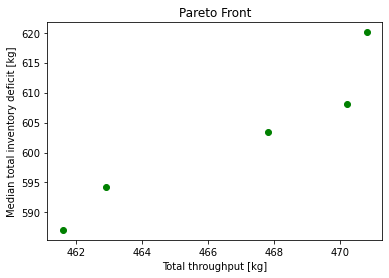

In [32]:
import matplotlib.pyplot as plt
x=pop.objectives_raw[:,0]
y=pop.objectives_raw[:,1]
plt.scatter(x,y,c="g",label="Pareto Front")
plt.title('Pareto Front')
plt.xlabel('Total throughput [kg]')
plt.ylabel('Median total inventory deficit [kg]')
file_name=str(date.day)+"-"+str(date.month)+str(date.hour)+'pareto_front.png'
path=root_path_analysis+file_name
plt.savefig(path+file_name)
plt.show()

In [33]:
file_name='df_ind_base.csv'# Article Data
path=root_path_data+file_name
df_ind_base=pd.read_csv(path)

df_ind_w=pd.concat([df_ind_base,df_ind])
path=root_path_analysis+str(date.day)+"-"+str(date.month)+str(date.hour)+".csv"
df_ind_w.to_csv(path)
df_ind_w

,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.82,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.50,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,461.6,41.861155,35.532347,2.433653,35.091078,31.213757,0.00,687.323710,591.391954,31.983948,587.082114,514.598901,587.082114,"[21, 16, 31, 12, 7, 7, 8]","[3, 2, 0, 3, 2, 0, 1]","[2016-12-01, 2017-06-22, 2017-11-26, 2018-08-15, 2018-12-26, 2019-03-30, 2019-07-02]","[2017-06-22, 2017-11-26, 2018-08-15, 2018-12-26, 2019-03-30, 2019-07-02, 2019-11-03]"
1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,470.8,44.223134,35.783537,2.391289,35.499388,30.840925,0.00,712.101305,622.197185,36.034471,620.074496,549.307411,620.074496,"[21, 16, 31, 14, 6, 6, 9]","[3, 2, 0, 3, 2, 0, 1]","[2016-12-01, 2017-06-22, 2017-11-26, 2018-08-15, 2019-01-09, 2019-04-06, 2019-07-02]","[2017-06-22, 2017-11-26, 2018-08-15, 2019-01-09, 2019-04-06, 2019-07-02, 2019-11-14]"


# Data Analysis
## Evaluating each tests

### Main 8/1
- Main 8/1
    - Calculated demand with Monte Carlo
    - 10 Executions
    - No solution without violations, passing all in front 0
    - Total time  17632.4670568 Per execution 1763.24670568

In [34]:
# Import from csv
result=pd.read_csv(root_path_analysis+'8-1.csv')
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.0,0.0,0.820000,683.4,432.600000,58.600000,424.4,259.4,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.0,0.0,0.500000,786.0,558.600000,59.000000,551.7,355.6,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlometrics_front0_w_vio,100,1000,2,0.5,(0.04, 0.61, 0.77, 0.47)",X,630.1,10.435893,1.059073,2.617906,0.0,0.0,152.506570,34.1,6.420617,10.388137,0.0,0.0,0.0,[31 28 31 31],[3 2 3 2],['2016-12-01' '2017-09-11' '2018-05-30' '2019-03-10'],['2017-08-24' '2018-05-10' '2019-02-20' '2019-11-27']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlometrics_front0_w_vio,100,1000,2,0.5,(0.04, 0.61, 0.77, 0.47)",Y,660.5,12.347932,1.445241,3.050971,0.0,0.0,208.114675,38.5,8.729108,12.264356,0.0,0.0,0.0,[50 31 50],[2 3 2],['2016-12-01' '2018-01-20' '2018-10-31'],['2017-12-31' '2018-10-13' '2019-11-30']


1. Attributes that seem wrong
    - P(total backlog ≤ 0 kg)	
        - My value is high, what makes sense, since I am producing large number of batches and not procuding all products.
            - This indicates I need to review my fitness, why is it focusing on product 2,3 and large batches?
                1. Modify my backlog, to consider the median
    - Max total inventory deficit [kg]	
    - Mean total inventory deficit [kg]	
    - Median total inventory deficit [kg]	
    - Min total inventory deficit [kg]	
    - Total Deficit [kg]	
    - Batches [un]
        - Large values of batches, however still only producing products 2 and 3.

### Main 14/1 14h
- Main 14/1 14h
    - New scheduling considering articles pseudo code 
    - Monte Carlo simulations=100
    - 2 Executions, with 1000 generations
    - No solution without violations, passing all in front 0
    - Total time  877 Per execution 438

In [35]:
result=pd.read_csv(root_path_analysis+'14-114.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.0,0.0,0.820000,683.4,432.600000,58.600000,424.4,259.4,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.0,0.0,0.500000,786.0,558.600000,59.000000,551.7,355.6,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,663.8,10.402717,1.085342,2.622689,0.0,0.0,156.289225,34.1,6.568086,10.348981,0.0,0.0,0.0,[31 36 30 31],[3 2 3 2],['1970-01-01' '2017-08-31' '2018-06-24' '2019-03-10'],['2017-08-31' '2018-06-24' '2019-03-10' '2019-11-27']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,663.8,10.402717,1.085342,2.622689,0.0,0.0,156.289225,34.1,6.568086,10.348981,0.0,0.0,0.0,[31 36 30 31],[3 2 3 2],['1970-01-01' '2017-08-31' '2018-06-24' '2019-03-10'],['2017-08-31' '2018-06-24' '2019-03-10' '2019-11-27']


1. Start time of first batch is wrong, however just fixed

1. Attributes that seem wrong
    - P(total backlog ≤ 0 kg)	
        - My value is high, what makes sense, since I am producing large number of batches and not procuding all products.
            - This indicates I need to review my fitness, why is it focusing on product 2,3 and large batches?
                1. Modify my backlog, to consider the median
    - Max total inventory deficit [kg]	
    - Mean total inventory deficit [kg]	
    - Median total inventory deficit [kg]	
    - Min total inventory deficit [kg]	
    - Total Deficit [kg]	
    - Batches [un]
        - More reasonable values of batches, however still only producing products 2 and 3. 

### 15/1 12h
- 15/1 12h
    - Main Same as 14/1 14h, but
        - Monte Carlo simulations=1000
        - 9 Executions, with 1000 generations
        - No solution without violations, passing all in front 0
        - Total time  3640.99402 Per execution 404.5548911

In [36]:
result=pd.read_csv(root_path_analysis+'15-112.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.0,0.0,0.820000,683.4,432.600000,58.600000,424.4,259.4,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.0,0.0,0.500000,786.0,558.600000,59.000000,551.7,355.6,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,628.3,10.934849,1.590673,3.194870,0.0,0.0,229.056858,39.2,9.175706,12.019538,0.0,0.0,0.0,[29 49 30],[3 1 3],['2016-12-01' '2017-08-17' '2019-03-15'],['2017-08-17' '2019-03-15' '2019-11-29']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,663.8,12.294408,1.312156,2.878055,0.0,0.0,188.950524,38.5,8.390956,12.072244,0.0,0.0,0.0,[39 31 28 30],[2 3 2 3],['2016-12-01' '2017-10-22' '2018-07-15' '2019-03-13'],['2017-10-22' '2018-07-15' '2019-03-13' '2019-11-27']


- However in the terminal prompt there was different values of objectives, including a total through put 
of ca. 1000 therefore I need to check properly the data to understand what is going on.
- At least now some products 1 appear.

#### Individuals

In [37]:
name="15-114"+"solutions.csv"
results=pd.read_csv(root_path_analysis+name)# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[29 49 30],[3 1 3],[628.3 0. ]
1,1,[31 47 31],[3 1 3],[632.4 0. ]
2,2,[31 17 31 12 30],[3 2 3 2 3],[648.1 0. ]
3,3,[48 31 48 2],[2 3 2 1],[653.3 0. ]
4,4,[39 31 28 30],[2 3 2 3],[663.8 0. ]
5,5,[49 30 46 3],[2 3 2 3],[647. 0.]
6,6,[20 30 48 30],[2 3 2 3],[663.2 0. ]
7,7,[30 33 31 34],[3 2 3 2],[663.8 0. ]
8,8,[30 49 29],[3 1 3],[628.3 0. ]


- Number of batches seems more normal, now the product 0 appears, however still the second objective is not ok.
    - Necessary to modify the calculation of Monte Carlo

### 16/1 11h
- 16/1 11h
    - For each MC simulation the backlog and
        - Monte Carlo simulations=100
        - 2 Executions, with 1000 generations
        - No solution without violations, passing all in front 0
        - Total time 2316.344828 Per execution 1158.172414

In [38]:
import pandas as pd
result=pd.read_csv(root_path_analysis+'16-11.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.820000,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.500000,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,555.1,59.624545,51.448371,3.675727,51.270194,42.578911,5144.837076,600.258730,544.479692,18.349822,538.934509,513.782529,538.934509,[30 20 35 3 30],[3 2 0 1 3],['2016-12-01' '2017-08-24' '2018-02-25' '2018-12-12' '2019-02-19'],['2017-08-24' '2018-02-25' '2018-12-12' '2019-02-19' '2019-11-05']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,664.4,173.103326,160.542772,4.240579,160.138411,150.386980,16054.277250,975.238612,950.897649,8.460427,950.950597,929.944914,950.950597,[31 36 31 30],[3 2 3 2],['2016-12-01' '2017-08-31' '2018-06-24' '2019-03-17'],['2017-08-31' '2018-06-24' '2019-03-17' '2019-11-27']


1. Attributes analysis
    - OK 'Total throughput [kg]', 
    - 'Max total backlog [kg]', 
        - Potencialmente alto
    - 'Mean total backlog [kg]', 
    - 'std dev total backlog [kg]', 
    - 'Median total backlog [kg]', 
        - Valores altos, preciso de uma estrategia para reduzir o backlog.
            - Pode ser devido a minha reinversao de valores
            - Forma de Calculo do backlog
                - Testarei Contar as violacoes como np.sum(np.median(distribution_sums_backlog) > 0),  # 6)Backlog violations, para count_backlog_violations_j adds if is greater than 0
    - 'Min total backlog [kg]', 
    - 'P(total backlog ≤ 0 kg)', 
        - Perhaps the problem is given the inversion that I make
    - OK 'Max total inventory deficit [kg]', 
    - OK 'Mean total inventory deficit [kg]', 
    - OK 'std dev inventory deficit [kg]', 
    - OK 'Median total inventory deficit [kg]', 
    - OK 'Min total inventory deficit [kg]', 
    - 'Total Deficit [kg]', 
    - 'Batches [un]', 
        - More reasonable values of batches     
    - 'Product label', 
    - 'Start of USP [date]', 
    - 'End of DSP [date]']

In [39]:
name="16-11"+"solutions.csv"
results=pd.read_csv(root_path_analysis+name)# Import from csv
results.head(5)

,Unnamed: 0,Batches,Products,Objectives
0,0,[31 39 26 31],[3 2 0 3],[612.7 697.03984737]
1,1,[24 21 28 30 19],[3 2 0 3 2],[579.8 588.47419239]
2,2,[25 48 31 24],[3 2 3 2],[660.8 926.38878466]
3,3,[31 22 30 46],[3 2 0 2],[596.7 632.30311669]
4,4,[30 42 25 31],[3 2 0 3],[618.8 726.31102836]


### 17/1 11h
- 17/1 11h
    - For each MC simulation the backlog and
        - Monte Carlo simulations=100
        - 20 Executions, with 1000 generations
        - No solution without violations, passing all in front 0
        - Total time  38379.314743200004 Per execution 1918.9657371600001
            - Forma de Calculo do backlog
                - Testarei Contar as violacoes como np.sum(np.median(distribution_sums_backlog) > 0),  # 6)Backlog violations, para count_backlog_violations_j adds if is greater than 0
 

In [40]:
import pandas as pd
result=pd.read_csv(root_path_analysis+'17-111.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.820000,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.500000,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,-664.4,175.398621,161.514449,4.865560,161.629052,148.184403,16151.444877,974.555720,948.604516,7.694172,947.916675,933.835582,947.916675,[31 49 31 17],[3 2 3 2],['2016-12-01' '2017-08-31' '2018-09-23' '2019-06-16'],['2017-08-31' '2018-09-23' '2019-06-16' '2019-11-27']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,-441.7,63.744327,56.892965,3.185055,56.978196,48.840320,5689.296540,559.643422,494.857244,17.523500,490.288892,468.000286,490.288892,[30 14 34 8 3 3 2 3],[3 2 0 2 3 1 2 1],['2016-12-01' '2017-08-24' '2018-01-14' '2018-10-24' '2019-02-02'\n '2019-04-13' '2019-06-21' '2019-08-19'],['2017-08-24' '2018-01-14' '2018-10-24' '2019-02-02' '2019-04-13'\n '2019-06-21' '2019-08-19' '2019-10-27']


1. Attributes analysis
    - 'Total throughput [kg]',
        - Negative because I must fix the inversion correction, the true value is the modulo. Fix added to code.
    - 'Max total backlog [kg]', 
        - Potencialmente alto
    - 'Mean total backlog [kg]', 
    - 'std dev total backlog [kg]', 
    - 'Median total backlog [kg]', 
        - Valores altos, preciso de uma estrategia para reduzir o backlog.
            - Pode ser devido a minha reinversao de valores
            - Forma de Calculo do backlog
                - Test Contar cumulativamente as violacoes em todas as simulacoes de Monte como np.sum(np.median(distribution_sums_backlog) > 0),  # 6)Backlog violations, para count_backlog_violations_j adds if is greater than 0
                    - It did not worked, results are similar
                - Test Count the number of month violations per simulation count_backlog_violations_j += np.sum(backlog_j>0), instead of counting 1 in case any violation happen.
    - 'Min total backlog [kg]',
        - High values
    - 'P(total backlog ≤ 0 kg)', 
        - Perhaps the problem is given the inversion that I make
    - OK 'Max total inventory deficit [kg]', 
    - OK 'Mean total inventory deficit [kg]', 
    - OK 'std dev inventory deficit [kg]', 
    - OK 'Median total inventory deficit [kg]', 
    - OK 'Min total inventory deficit [kg]', 
    - 'Total Deficit [kg]', 
    - 'Batches [un]', 
        - More reasonable values of batches     
    - 'Product label', 
    - 'Start of USP [date]', 
    - 'End of DSP [date]']

In [41]:
name="17-111"+"solutions.csv"
results=pd.read_csv(root_path_analysis+name)# Import from csv
results.head(5)

,Unnamed: 0,Batches,Products,Objectives
0,0,[31 42 24 31],[3 2 0 3],[-621.2 737.72287893]
1,1,[31 40 26 31],[3 2 0 3],[-617.6 708.86045982]
2,2,[30 21 4 30 36],[3 2 1 3 2],[-634.1 840.08847325]
3,3,[31 49 31 17],[3 2 3 2],[-664.4 947.91667481]
4,4,[24 33 31 3 30],[3 2 3 1 3],[-647.8 880.15120185]


- More Frequent batches start to appear

### 17/1 14h
- 17/1 14h
    - For each MC simulation the backlog and
        - Monte Carlo simulations=100
        - 2 Executions, with 1000 generations
        - No solution without violations, passing all in front 0
        - Total time  1912.581895 Per execution 956.2909475
            - Forma de Calculo do backlog
                - Test Count the number of month violations per simulation count_backlog_violations_j += np.sum(backlog_j>0), instead of counting 1 in case any violation happen.

In [42]:
name="17-114"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.820000,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.500000,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,479.4,55.135830,44.868747,3.141599,44.431457,37.872310,4486.874706,603.031843,534.388733,20.816774,534.893691,484.106379,534.893691,[27 20 34 2 9 2 9],[3 2 0 1 3 2 1],['2016-12-01' '2017-08-03' '2018-02-04' '2018-11-14' '2019-01-11'\n '2019-05-03' '2019-07-01'],['2017-08-03' '2018-02-04' '2018-11-14' '2019-01-11' '2019-05-03'\n '2019-07-01' '2019-11-24']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,534.5,57.648191,46.385282,3.932886,45.992487,38.991321,4638.528177,751.858560,678.713048,32.656691,675.767888,614.707595,675.767888,[21 42 15 29 9],[3 0 2 3 1],['2016-12-01' '2017-06-22' '2018-05-27' '2018-10-24' '2019-07-03'],['2017-06-22' '2018-05-27' '2018-10-24' '2019-07-03' '2019-11-15']


1. Attributes analysis
    - OK 'Total throughput [kg]',
    - 'Max total backlog [kg]', 
        - Potencialmente alto
    - 'Mean total backlog [kg]', 
    - 'std dev total backlog [kg]', 
    - 'Median total backlog [kg]', 
        - Valores altos, preciso de uma estrategia para reduzir o backlog.
            - Pode ser devido a minha reinversao de valores
            - Different backlog calculus tests
                - Test Contar cumulativamente as violacoes em todas as simulacoes de Monte como np.sum(np.median(distribution_sums_backlog) > 0),Backlog violations, para count_backlog_violations_j adds if is greater than 0
                    - It did not worked, results are similar
                - Test Count the number of month violations per simulation count_backlog_violations_j += np.sum(backlog_j>0), instead of counting 1 in case any violation happen.
                    - It did not worked, backlog even increased
                - Test Count a violation if median of a backlog_j>0: if np.median(backlog_j)>0: count_backlog_violations_j += 1
    - 'Min total backlog [kg]',
        - High values
    - 'P(total backlog ≤ 0 kg)', 
        - Perhaps the problem is given the inversion that I make
    - OK 'Max total inventory deficit [kg]', 
    - OK 'Mean total inventory deficit [kg]', 
    - OK 'std dev inventory deficit [kg]', 
    - OK 'Median total inventory deficit [kg]', 
    - OK 'Min total inventory deficit [kg]', 
    - 'Total Deficit [kg]', 
    - 'Batches [un]', 
    - 'Product label', 
    - 'Start of USP [date]', 
    - 'End of DSP [date]']

In [43]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[27 20 34 2 9 2 9],[3 2 0 1 3 2 1],[479.4 534.8936909]
1,1,[27 20 35 3 6 2 15],[3 2 0 1 3 2 3],[498.9 546.97499006]
2,2,[27 20 35 3 6 2 14],[3 2 0 1 3 2 3],[493.4 544.73476978]
3,3,[27 21 34 4 6 19],[3 2 0 1 3 2],[507.7 566.5046132]
4,4,[27 19 34 2 9 3 10],[3 2 0 1 3 2 1],[485.6 536.10342533]
5,5,[21 42 15 29 9],[3 0 2 3 1],[534.5 675.76788817]
6,6,[22 42 15 27 3 3],[3 0 2 3 1 3],[508.3 664.18020446]
7,7,[22 42 15 27 8],[3 0 2 3 1],[522.8 666.27026063]
8,8,[22 42 15 27 5 2],[3 0 2 3 1 0],[510.4 665.5692583]


- Interestingly I do have smaller batches 

### 17/1 16h
- 17/1 16
    - For each MC simulation the backlog and
        - Monte Carlo simulations=100
        - 2 Executions, with 1000 generations
        - No solution without violations, passing all in front 0
        - 
            - Forma de Calculo do backlog
                - Test Count a violation if median of a backlog_j>0: if np.median(backlog_j)>0: count_backlog_violations_j += 1


In [44]:
name="17-116"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.820000,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.500000,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,534.2,63.086262,56.382315,3.116220,55.912935,49.518924,5638.231476,582.027620,499.819980,22.575882,494.019625,461.073588,494.019625,[30 14 34 7 2 27],[3 2 0 2 1 3],['2016-12-01' '2017-08-24' '2018-01-14' '2018-10-24' '2019-01-26'\n '2019-03-25'],['2017-08-24' '2018-01-14' '2018-10-24' '2019-01-26' '2019-03-25'\n '2019-11-25']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,664.4,173.771044,160.705977,5.007383,160.534350,146.672914,16070.597745,966.260214,949.538127,7.570990,948.863999,931.360015,948.863999,[31 27 31 39],[3 2 3 2],['2016-12-01' '2017-08-31' '2018-04-22' '2019-01-13'],['2017-08-31' '2018-04-22' '2019-01-13' '2019-11-27']


1. Attributes analysis
    - OK 'Total throughput [kg]',
    - 'Max total backlog [kg]', 
        - Potencialmente alto
    - 'Mean total backlog [kg]', 
    - 'std dev total backlog [kg]', 
    - 'Median total backlog [kg]', 
        - Valores altos, preciso de uma estrategia para reduzir o backlog.
            - Pode ser devido a minha reinversao de valores
            - Different backlog calculus tests
                - Test Contar cumulativamente as violacoes em todas as simulacoes de Monte como np.sum(np.median(distribution_sums_backlog) > 0),Backlog violations, para count_backlog_violations_j adds if is greater than 0
                    - It did not worked, results are similar
                - Test Count the number of month violations per simulation count_backlog_violations_j += np.sum(backlog_j>0), instead of counting 1 in case any violation happen.
                    - It did not worked, backlog even increased
                - Test Count a violation if median of a backlog_j>0: if np.median(backlog_j)>0: count_backlog_violations_j += 1
                    - Fail, backlog keep high
    - 'Min total backlog [kg]',
        - High values
    - 'P(total backlog ≤ 0 kg)', 
        - Perhaps the problem is given the inversion that I make
    - OK 'Max total inventory deficit [kg]', 
    - OK 'Mean total inventory deficit [kg]', 
    - OK 'std dev inventory deficit [kg]', 
    - OK 'Median total inventory deficit [kg]', 
    - OK 'Min total inventory deficit [kg]', 
    - 'Total Deficit [kg]', 
    - 'Batches [un]', 
    - 'Product label', 
    - 'Start of USP [date]', 
    - 'End of DSP [date]']

In [45]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results.head(5)

,Unnamed: 0,Batches,Products,Objectives
0,0,[31 38 28 31],[3 2 0 3],[614. 698.92332263]
1,1,[30 31 24 31],[3 2 1 3],[636.2 870.32054784]
2,2,[30 14 34 7 2 28],[3 2 0 2 1 3],[539.7 498.43372379]
3,3,[30 35 32 31],[3 0 2 3],[600.8 652.59255213]
4,4,[30 14 35 10 31],[3 2 0 2 3],[561.6 516.94422466]


### 17/1 1h
- 17/1 1
    - For each MC simulation the backlog and
        - Monte Carlo simulations=500
        - 2 Executions, with 1000 generations
        - No solution without violations, passing all in front 0
            - Forma de Calculo do backlog (Same as last one, but different Monte Carlo Simulations)
                - Test Count a violation if median of a backlog_j>0: if np.median(backlog_j)>0: count_backlog_violations_j += 1


In [46]:
name="17-119"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.820000,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.500000,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,454.3,67.591227,53.289372,3.806753,53.079218,44.203325,26644.685787,604.644893,511.996967,25.439492,508.703268,454.707623,508.703268,[24 20 31 12 3 4 3 3],[3 2 0 3 1 0 3 2],['2016-12-01' '2017-07-13' '2018-01-14' '2018-10-03' '2019-02-13'\n '2019-04-23' '2019-07-05' '2019-09-13'],['2017-07-13' '2018-01-14' '2018-10-03' '2019-02-13' '2019-04-23'\n '2019-07-05' '2019-09-13' '2019-11-25']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,663.8,175.124476,160.913481,4.895376,160.878488,149.760069,80456.740412,967.453229,945.312277,7.544753,945.434233,922.011926,945.434233,[30 43 31 24],[3 2 3 2],['2016-12-01' '2017-08-24' '2018-08-05' '2019-04-28'],['2017-08-24' '2018-08-05' '2019-04-28' '2019-11-27']


1. Attributes analysis
    - OK 'Total throughput [kg]',
    - 'Max total backlog [kg]', 
        - Potencialmente alto
    - 'Mean total backlog [kg]', 
    - 'std dev total backlog [kg]', 
    - 'Median total backlog [kg]', 
        - Valores altos, preciso de uma estrategia para reduzir o backlog.
            - Pode ser devido a minha reinversao de valores
            - Different backlog calculus tests
                - Test Contar cumulativamente as violacoes em todas as simulacoes de Monte como np.sum(np.median(distribution_sums_backlog) > 0),Backlog violations, para count_backlog_violations_j adds if is greater than 0
                    - It did not worked, results are similar
                - Test Count the number of month violations per simulation count_backlog_violations_j += np.sum(backlog_j>0), instead of counting 1 in case any violation happen.
                    - It did not worked, backlog even increased
                - Test Count a violation if median of a backlog_j>0: if np.median(backlog_j)>0: count_backlog_violations_j += 1
                    - Fail, backlog keep high
                - Test  Count a violation if median of a backlog_j>0: if np.median(backlog_j)>0: count_backlog_violations_j += 1 but higher number of Monte Carlo
                    - Did not worked backlog reached values much higher
                - Test Instead of count use the actual median of the sum of backlogs
    - 'Min total backlog [kg]',
        - High values
    - 'P(total backlog ≤ 0 kg)', 
        - Perhaps the problem is given the inversion that I make
    - OK 'Max total inventory deficit [kg]', 
    - OK 'Mean total inventory deficit [kg]', 
    - OK 'std dev inventory deficit [kg]', 
    - OK 'Median total inventory deficit [kg]', 
    - OK 'Min total inventory deficit [kg]', 
    - 'Total Deficit [kg]', 
    - 'Batches [un]', 
    - 'Product label', 
    - 'Start of USP [date]', 
    - 'End of DSP [date]']

In [47]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results.head()

,Unnamed: 0,Batches,Products,Objectives
0,0,[26 25 30 46],[3 2 3 2],[655.9 929.44543501]
1,1,[30 20 35 3 31],[3 2 0 1 3],[560.6 543.50098449]
2,2,[29 22 31 46],[3 2 3 2],[663.2 940.55870599]
3,3,[31 39 18 31],[3 2 1 3],[643.7 872.31489056]
4,4,[31 15 34 49],[3 2 0 2],[589.5 558.63485263]


### 17/1 1h
- 18/1 8
    - For each MC simulation the backlog and
        - Monte Carlo simulations=1000
        - 6 Executions, with 1000 generations
        - No solution without violations, passing all in front 0
            - UseMeadian as violation
                - Total time  23069.192419299998 Per execution 3844.8654032166664

In [48]:
name="18-18"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.820000,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.500000,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,511.5,61.824706,48.108472,3.228153,47.901164,37.409326,48108.471968,679.473248,565.562458,27.288181,561.125962,497.369182,561.125962,[30 33 16 3 12 20],[3 0 2 1 0 3],['2016-12-01' '2017-08-24' '2018-05-27' '2018-10-31' '2019-01-08'\n '2019-05-17'],['2017-08-24' '2018-05-27' '2018-10-31' '2019-01-08' '2019-05-17'\n '2019-11-29']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,524.2,61.349786,48.004156,3.038205,47.848716,39.519227,48004.155650,705.272415,576.938619,29.155788,573.524686,509.244144,573.524686,[31 29 16 3 13 23],[3 0 2 1 0 3],['2016-12-01' '2017-08-31' '2018-05-06' '2018-10-10' '2018-12-18'\n '2019-05-03'],['2017-08-31' '2018-05-06' '2018-10-10' '2018-12-18' '2019-05-03'\n '2019-11-29']


1. Attributes analysis
    - OK 'Total throughput [kg]',
    - 'Max total backlog [kg]', 
        - Potencialmente alto
    - 'Mean total backlog [kg]', 
    - 'std dev total backlog [kg]', 
    - 'Median total backlog [kg]', 
        - Valores altos, preciso de uma estrategia para reduzir o backlog.
            - Pode ser devido a minha reinversao de valores
            - Different backlog calculus tests
                - Test Contar cumulativamente as violacoes em todas as simulacoes de Monte como np.sum(np.median(distribution_sums_backlog) > 0),Backlog violations, para count_backlog_violations_j adds if is greater than 0
                    - It did not worked, results are similar
                - Test Count the number of month violations per simulation count_backlog_violations_j += np.sum(backlog_j>0), instead of counting 1 in case any violation happen.
                    - It did not worked, backlog even increased
                - Test Count a violation if median of a backlog_j>0: if np.median(backlog_j)>0: count_backlog_violations_j += 1
                    - Fail, backlog keep high
                - Test  Count a violation if median of a backlog_j>0: if np.median(backlog_j)>0: count_backlog_violations_j += 1 but higher number of Monte Carlo
                    - Did not worked backlog reached values much higher
                - Test Instead of count use the actual median of the sum of backlogs
                    - Did not work, perhaps the problem is in my consolidation of population and not actually in the calculation.
    - 'Min total backlog [kg]',
        - High values
    - 'P(total backlog ≤ 0 kg)', 
        - Perhaps the problem is given the inversion that I make
    - OK 'Max total inventory deficit [kg]', 
    - OK 'Mean total inventory deficit [kg]', 
    - OK 'std dev inventory deficit [kg]', 
    - OK 'Median total inventory deficit [kg]', 
    - OK 'Min total inventory deficit [kg]', 
    - 'Total Deficit [kg]', 
    - 'Batches [un]', 
    - 'Product label', 
    - 'Start of USP [date]', 
    - 'End of DSP [date]']

In [28]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[31 32 16 3 12 20],[3 0 2 1 0 3],[513.9 561.67658134]
1,1,[31 29 16 3 13 23],[3 0 2 1 0 3],[524.2 573.52468595]
2,2,[31 32 16 3 12 21],[3 0 2 1 0 3],[519.4 565.36045131]
3,3,[30 33 16 3 12 20],[3 0 2 1 0 3],[511.5 561.12596216]


In [ ]:
### 18/1 1h
- 18/1 17
    - For each MC simulation the backlog and
        - Monte Carlo simulations=100
        - 1 Executions, with 1000 generations
        - No solution without violations, passing all in front 0
            - Violation is the median of the sum of backlogs per simulations
            - P backlog is the Probability.
                - Total time  1675.0111848000001 Per execution 1675.0111848000001

In [51]:
name="18-117"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.82,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.50,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,461.6,41.861155,35.532347,2.433653,35.091078,31.213757,0.00,687.323710,591.391954,31.983948,587.082114,514.598901,587.082114,[21 16 31 12 7 7 8],[3 2 0 3 2 0 1],['2016-12-01' '2017-06-22' '2017-11-26' '2018-08-15' '2018-12-26'\n '2019-03-30' '2019-07-02'],['2017-06-22' '2017-11-26' '2018-08-15' '2018-12-26' '2019-03-30'\n '2019-07-02' '2019-11-03']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,470.8,44.223134,35.783537,2.391289,35.499388,30.840925,0.00,712.101305,622.197185,36.034471,620.074496,549.307411,620.074496,[21 16 31 14 6 6 9],[3 2 0 3 2 0 1],['2016-12-01' '2017-06-22' '2017-11-26' '2018-08-15' '2019-01-09'\n '2019-04-06' '2019-07-02'],['2017-06-22' '2017-11-26' '2018-08-15' '2019-01-09' '2019-04-06'\n '2019-07-02' '2019-11-14']


1. Attributes analysis
    - OK 'Total throughput [kg]',
    - 'Max total backlog [kg]', 
        - Potencialmente alto
    - 'Mean total backlog [kg]', 
    - 'std dev total backlog [kg]', 
    - 'Median total backlog [kg]', 
        - Valores altos, preciso de uma estrategia para reduzir o backlog.
            - Pode ser devido a minha reinversao de valores
            - Different backlog calculus tests
                - Test Contar cumulativamente as violacoes em todas as simulacoes de Monte como np.sum(np.median(distribution_sums_backlog) > 0),Backlog violations, para count_backlog_violations_j adds if is greater than 0
                    - It did not worked, results are similar
                - Test Count the number of month violations per simulation count_backlog_violations_j += np.sum(backlog_j>0), instead of counting 1 in case any violation happen.
                    - It did not worked, backlog even increased
                - Test Count a violation if median of a backlog_j>0: if np.median(backlog_j)>0: count_backlog_violations_j += 1
                    - Fail, backlog keep high
                - Test  Count a violation if median of a backlog_j>0: if np.median(backlog_j)>0: count_backlog_violations_j += 1 but higher number of Monte Carlo
                    - Did not worked backlog reached values much higher
                - Test Instead of count use the actual median of the sum of backlogs
                    - Did not work, perhaps the problem is in my consolidation of population and not actually in the calculation.
    - 'Min total backlog [kg]',
        - High values
    - 'P(total backlog ≤ 0 kg)', 
        - This is the Probability, fixed now
    - OK 'Max total inventory deficit [kg]', 
    - OK 'Mean total inventory deficit [kg]', 
    - OK 'std dev inventory deficit [kg]', 
    - OK 'Median total inventory deficit [kg]', 
    - OK 'Min total inventory deficit [kg]', 
    - 'Total Deficit [kg]', 
    - 'Batches [un]', 
    - 'Product label', 
    - 'Start of USP [date]', 
    - 'End of DSP [date]']

In [52]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[21 16 31 12 7 7 8],[3 2 0 3 2 0 1],[461.6 587.08211389]
1,1,[21 16 32 12 6 6 9],[3 2 0 3 2 0 1],[462.9 594.16492768]
2,2,[21 16 32 12 7 6 9],[3 2 0 3 2 0 1],[467.8 603.42444056]
3,3,[21 16 31 13 7 6 9],[3 2 0 3 2 0 1],[470.2 608.04883301]
4,4,[21 16 31 14 6 6 9],[3 2 0 3 2 0 1],[470.8 620.07449594]
